In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline

J'ai downloadé le json sur l'interface de loraserver, puis, avec un peu de python et de vim, j'en ai fait un csv avec les données qui m'interessait.

Mais j'aurais très bien pu tout faire en python et construire mon dataframe à partir du json, mais bon ...

Quelques info si je le devais le faire:
>>> import json
>>> filename="d.json"
>>> with open(filename, 'r') as f:
>>>     d = json.load(f)
>>> for e in d:
...     print(e['payload']['rxInfo'][0]['time'])   


In [67]:
df = pd.read_csv("40min.csv",sep=',', parse_dates=['time'], index_col='time',\
                 date_parser=lambda x:datetime.strptime(x,'%H:%M:%S'))
dc = df.cumsum().reset_index()


In [79]:
mean = pd.concat([dc[0:1], dc[-1:]])

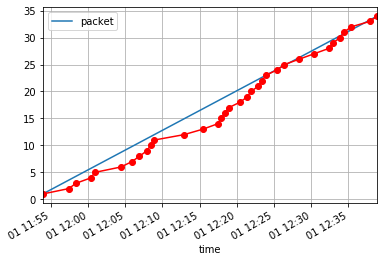

In [86]:
mean.plot('time', 'packet')
plt.plot('time', 'packet', 'r-o', data=dc)
plt.grid(True)
plt.show()

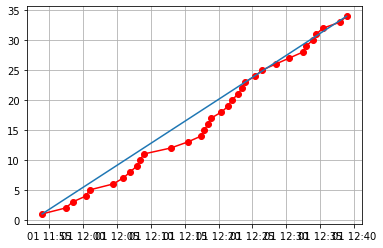

In [85]:
plt.plot('time', 'packet', 'r-o', data=dc)
plt.plot('time', 'packet', data=mean)
plt.grid(True)
plt.show()